In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from highlight_text import HighlightText, ax_text, fig_text

## Read and filter in the reports data

In [2]:
df=pd.read_csv('./TCGA_Reports.csv')
df['case_id']=df['patient_filename'].apply(lambda x: x.split('.')[0])
tdf=pd.read_csv('/project/Multimodal_data/TCGA_LUNG_Data/tcga_lung.csv')
tdf['case_id']=tdf['filename'].apply(lambda x: '-'.join(x.split('-')[:3]))
fdf=df.merge(tdf, on='case_id')
fdf

,patient_filename,text,case_id,id,filename,md5,size,state,label
0,TCGA-44-8119.c40ea4c8-8cbe-4a44-96d4-ae524a916449,Final Surgical Pathology Report. Procedure: Di...,TCGA-44-8119,939eae7b-afc7-437a-81e3-1e9615897027,TCGA-44-8119-01Z-00-DX1.1EBEBFA7-22DB-4365-9DF...,3055be38a3a2f75cb0fdd663c3ee5def,98474973,released,LUAD
1,TCGA-44-6777.600a1078-21f2-4267-9d3c-03f292fa6a32,Date Recd: SPECIMEN. Left upper lobe wedge res...,TCGA-44-6777,cba0303e-5f68-433c-8459-a3565bc7ccab,TCGA-44-6777-01Z-00-DX1.aca7b23d-a601-4476-8bf...,9ea1398060a4960d17f4b09bb3913f63,304926153,released,LUAD
2,TCGA-56-7579.fd7a1de0-aa43-4d5a-b1e4-67473689bd58,FINAL SURGICAL PATHOLOGY REPORT. Diagnosis: A....,TCGA-56-7579,b349f98d-5c72-46f7-89e9-88116ce836e2,TCGA-56-7579-01Z-00-DX1.627f65b9-ac66-4f71-a6f...,816e31fa8ea14a57caff1b2f4e6cfa0c,161316295,released,LUSC
3,TCGA-34-7107.e944ec22-44f1-4a7c-a06c-50e0d2d167a9,"FINAL DIAGNUSIS: PART 1: LYMPH NODE, RIGHT LEV...",TCGA-34-7107,c6618582-3cd2-4861-8a50-d9e650f0bee6,TCGA-34-7107-01Z-00-DX1.c72202e6-740d-4891-945...,4defb88bba6bbc1b6b6751f632ab6787,463659549,released,LUSC
4,TCGA-98-A539.9CC9A747-F186-4BAE-B63F-82DC061B06FA,Observation Date. Last Edited Date. Diagnosis....,TCGA-98-A539,54390baa-3a83-4f0e-b24e-9c2cae8c3455,TCGA-98-A539-01Z-00-DX1.420AA419-0146-4991-B98...,09d47fdb3bd7cbf9391579a4ba718f4c,442944397,released,LUSC
...,...,...,...,...,...,...,...,...,...
977,TCGA-MP-A4SV.8E809652-9783-4B7A-B92D-8C393A2940AB,Requested RV. TISSUE DESCRIPTION: Left lower l...,TCGA-MP-A4SV,f7013b7b-9227-4606-9594-54689b8ab13b,TCGA-MP-A4SV-01Z-00-DX1.5430F2CF-BE4B-42D6-9CD...,2306c00755c7a08ed325f08aa9811ca1,1386511092,released,LUAD
978,TCGA-86-A4D0.80C129A3-A5B6-4B1C-9979-44A307867744,Gross Description: Microscopic Description: Di...,TCGA-86-A4D0,7bc387ff-930d-49d4-b93c-b1cc61d3ca65,TCGA-86-A4D0-01Z-00-DX1.165461AD-A8DA-4B7B-87C...,ef553463b9d8e294932019fbe0d7d4d2,1423668775,released,LUAD
979,TCGA-94-8035.ba6dd2df-43b6-414f-a5a7-160f31af73fb,Confidential Document. This information is sub...,TCGA-94-8035,95d8aad3-2260-49dc-a64e-804075a7f85b,TCGA-94-8035-01Z-00-DX1.6962cc61-cb5f-44c9-95f...,e4f7f242a72f9b40409b90d3f5e6f2d3,207805653,released,LUSC
980,TCGA-J1-A4AH.27031EAD-6E93-4973-869E-EFE13B7F899A,Encounter Number. COPY ONLY DO NOT FILE. Sourc...,TCGA-J1-A4AH,d7b57bca-6c28-4876-b726-b9e06bb359e6,TCGA-J1-A4AH-01Z-00-DX1.702A5CC6-0BFA-42F4-995...,5f5f1b31a43180665f4246719eeee075,1299245213,released,LUSC


In [3]:
# ref:https://stackoverflow.com/a/6117124
import re
def filter_using_regex(text, filter_list=['ductal', 'carcinoma', 'invasive', 'lobular','infiltrating','adenocarcinoma','squamous', 'squamous cell','cell','<','>']):
    text=text.lower()
    # rep = {"ductal": "", "invasive": "","carcinoma":""} # define desired replacements here
    rep={x:'' for x in filter_list}
    # use these three lines to do the replacement
    rep = dict((re.escape(k), v) for k, v in rep.items()) 
    pattern = re.compile("|".join(rep.keys()))
    text = pattern.sub(lambda m: rep[re.escape(m.group(0))], text)
    return text

fdf['text_filtered']=fdf['text'].apply(lambda x: filter_using_regex(x))

fdf['text_filtered_local']=fdf['text_filtered'].str.split('.')
fdf['text_unfiltered_local']=fdf['text'].str.split('.')

## Plot the reports with sentence clusters with the highest cross-modal attentions scores

In [4]:
# ref code: https://github.com/znstrider/highlight_text/blob/master/notebooks/title_bbox_encoding_spiegel-de.ipynb
def plot_text_highlights(sentence_labels, case_id, label, highlight_label,figsize=(10, 10)):
    reconstructed=''
    num_highlights=0
    for index, row in sentence_labels.iterrows():
        if index==0:
            reconstructed+=f'<Case ID: {case_id}, Label: {label}>\n\n'
        if (index+1)%3==0:
            reconstructed+='\n'
        if row['cluster_label']==highlight_label:
            reconstructed+='<'+row['sentences']+'>'
            num_highlights+=1
        else:
            reconstructed += row['sentences']
    
    # Code borrowed from:https://github.com/znstrider/highlight_text/blob/master/notebooks/title_bbox_encoding_spiegel-de.ipynb
    bbox_pad = 1.5
    bboxprops = {'linewidth': 0, 'pad': bbox_pad}
    highlight_textprops=[{'fontsize': 24, 'color': 'k', 'weight': 'bold'}]
    # highlight_textprops=[]
    highlight_colors={'color': 'w', 'weight': 'bold', 'bbox': {'facecolor':'#67001f',**bboxprops}, 'fontsize': 14, 'weight': 'bold'},
    highlight_textprops+=highlight_colors*num_highlights


    # Using matplotlibs new subplot_mosaic feature we can lay out our plot in advance.
    layout = [['title'],
    #           ['main'],
    #           ['annot']
             ]
    # We can also do more complex layouts like the one shown here, see the docs here:
    # https://matplotlib.org/3.3.0/tutorials/provisional/mosaic.html


    # gridspec_kw allows us to set the height_ratios and width_ratios
    fig, axd = plt.subplot_mosaic(layout,
                                  constrained_layout=False,
                                  figsize=figsize,
    #                               gridspec_kw={'height_ratios': [0.2, 0.6, 0.2]}
                                 )

    bbox_pad = 1.5
    bboxprops = {'linewidth': 0, 'pad': bbox_pad}

    # ax_text allows us to highlight text within delimiters <> using different
    # colors, weights, bbox_kws and path_effect_kws for each <subtext>
    title=\
    ax_text(s=reconstructed,
            x=0,
            y=0.4,
            va='center',
            highlight_textprops=highlight_textprops,
            ax=axd['title'],
            # fontname='Roboto',
            fontsize = 16
           );
    axd['title'].axis('off')
    plt.savefig(f'./{case_id}_{label}.png', facecolor='w', dpi=200, bbox_inches='tight')
    plt.show()

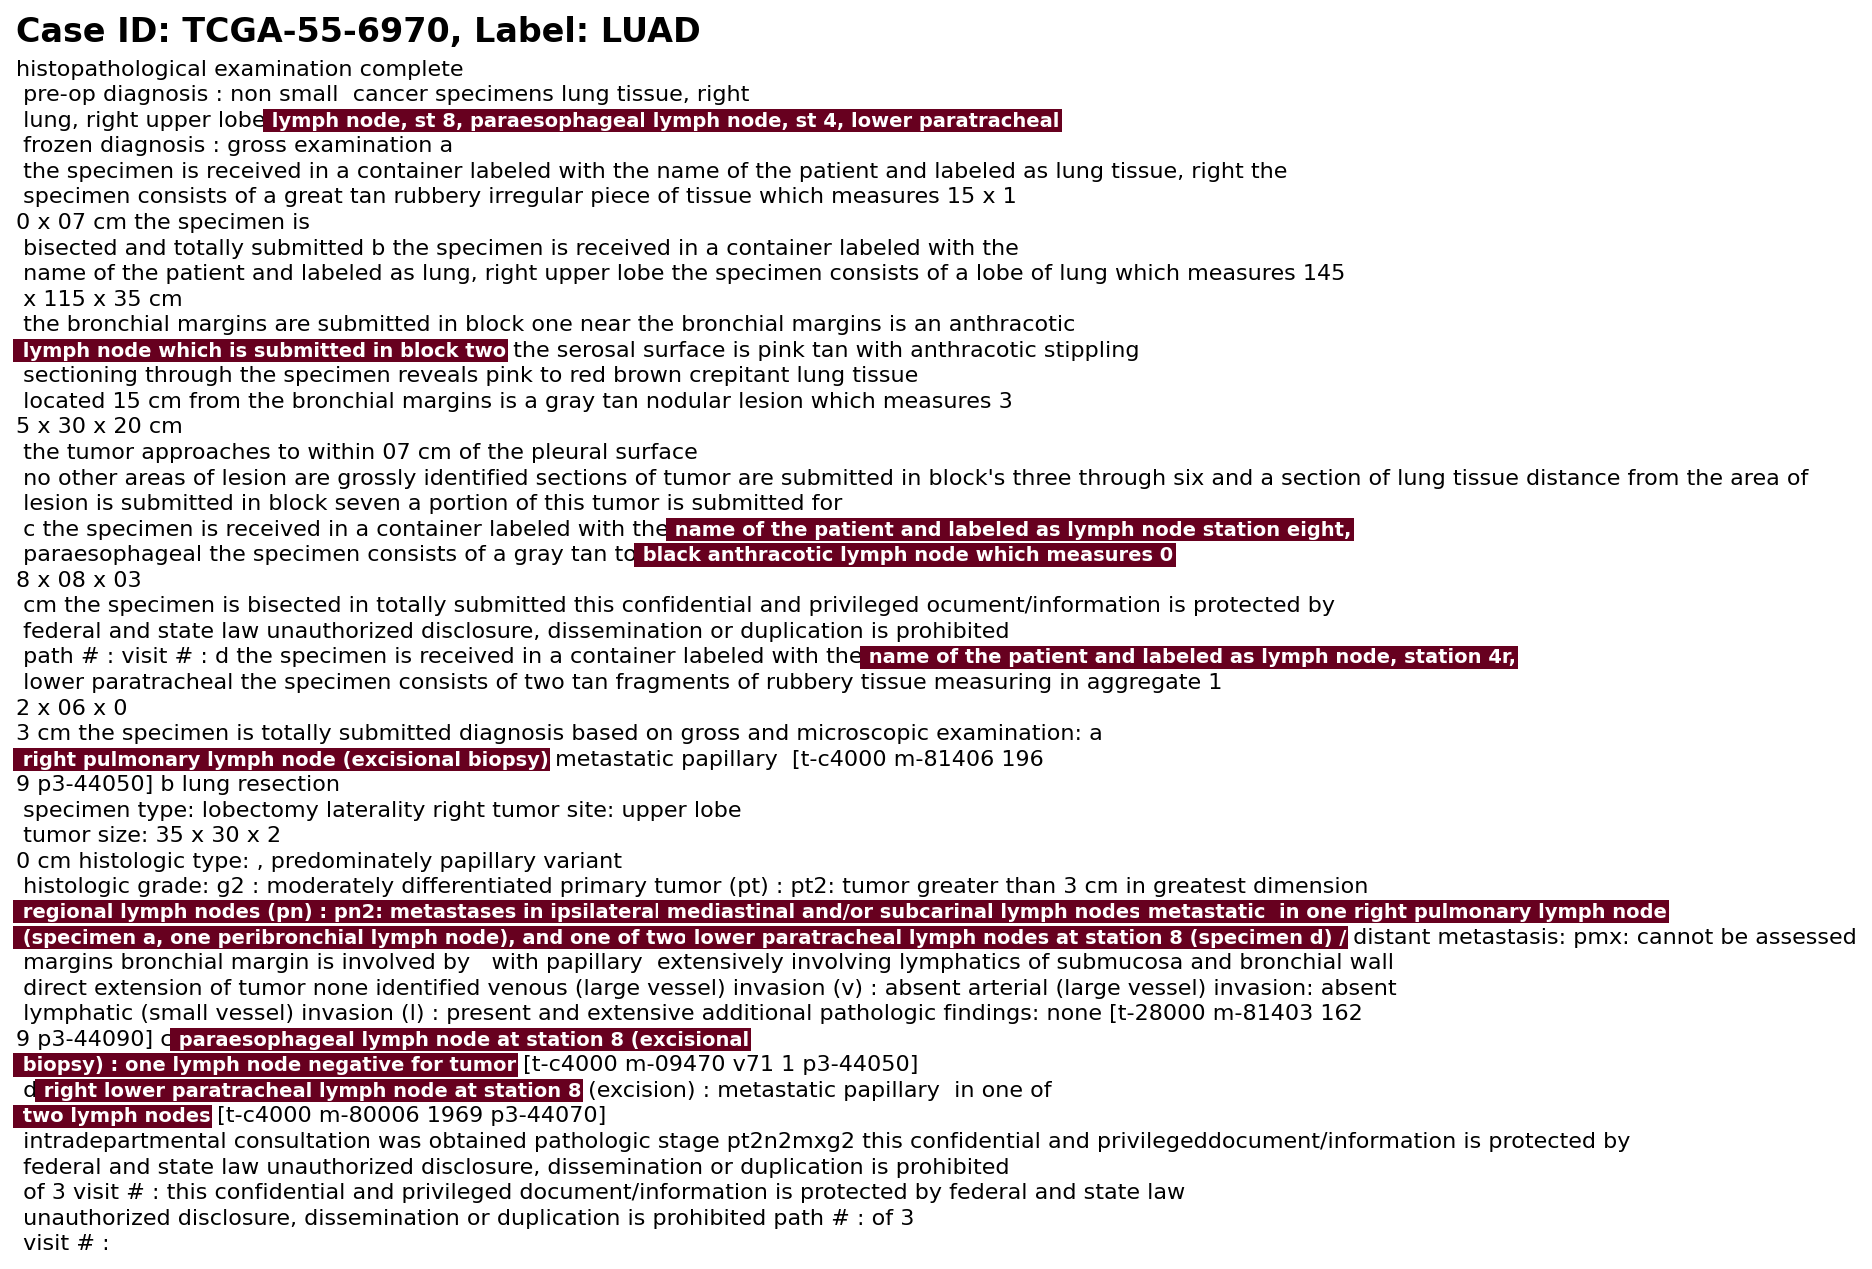

In [5]:
case_id='TCGA-55-6970'

cluster_labels=[ 5, 15, 1, 12, 3, 3, 9, 9, 4, 15, 7, 12, 3, 7, 8, 8, 0, 0,
 2, 12, 12, 7, 12, 3, 3, 11, 0, 0, 2, 10, 6, 10, 9, 15, 8, 15,
 8, 13, 6, 10, 8, 0, 0, 2, 1, 13, 15, 5, 1, 13, 5, 1, 12, 7,
 12, 9, 13, 8, 9, 0, 0, 11, 2, 12, 15, 15, 15, 15, 15, 12, 9, 13,
 12, 8, 0, 11, 0, 2, 12, 4, 9, 5, 11, 11, 7, 3, 3, 3, 3, 1,
 0, 0, 2, 5, 15, 5, 1, 15, 9, 9, 9, 9, 9, 5, 10, 13, 10, 1,
 14, 14, 14, 5, 11, 11, 7, 9, 9, 11, 11, 7, 9, 5, 9, 11, 11, 4,
 5, 15, 15, 15, 15, 11, 12, 15, 15, 15, 11, 15]
highlight_label=9
label=fdf[fdf['case_id']==case_id]['label'].iloc[0]

patient_sentences=fdf[fdf['case_id']==case_id]['text_filtered_local'].iloc[0]
patient_sentences_unf=fdf[fdf['case_id']==case_id]['text_unfiltered_local'].iloc[0]

sentence_labels=pd.DataFrame()
sentence_labels['sentences']=patient_sentences
sentence_labels['cluster_label']=cluster_labels
sentence_labels['patient_sentences_unf']=patient_sentences_unf
plot_text_highlights(sentence_labels, case_id, label, highlight_label)

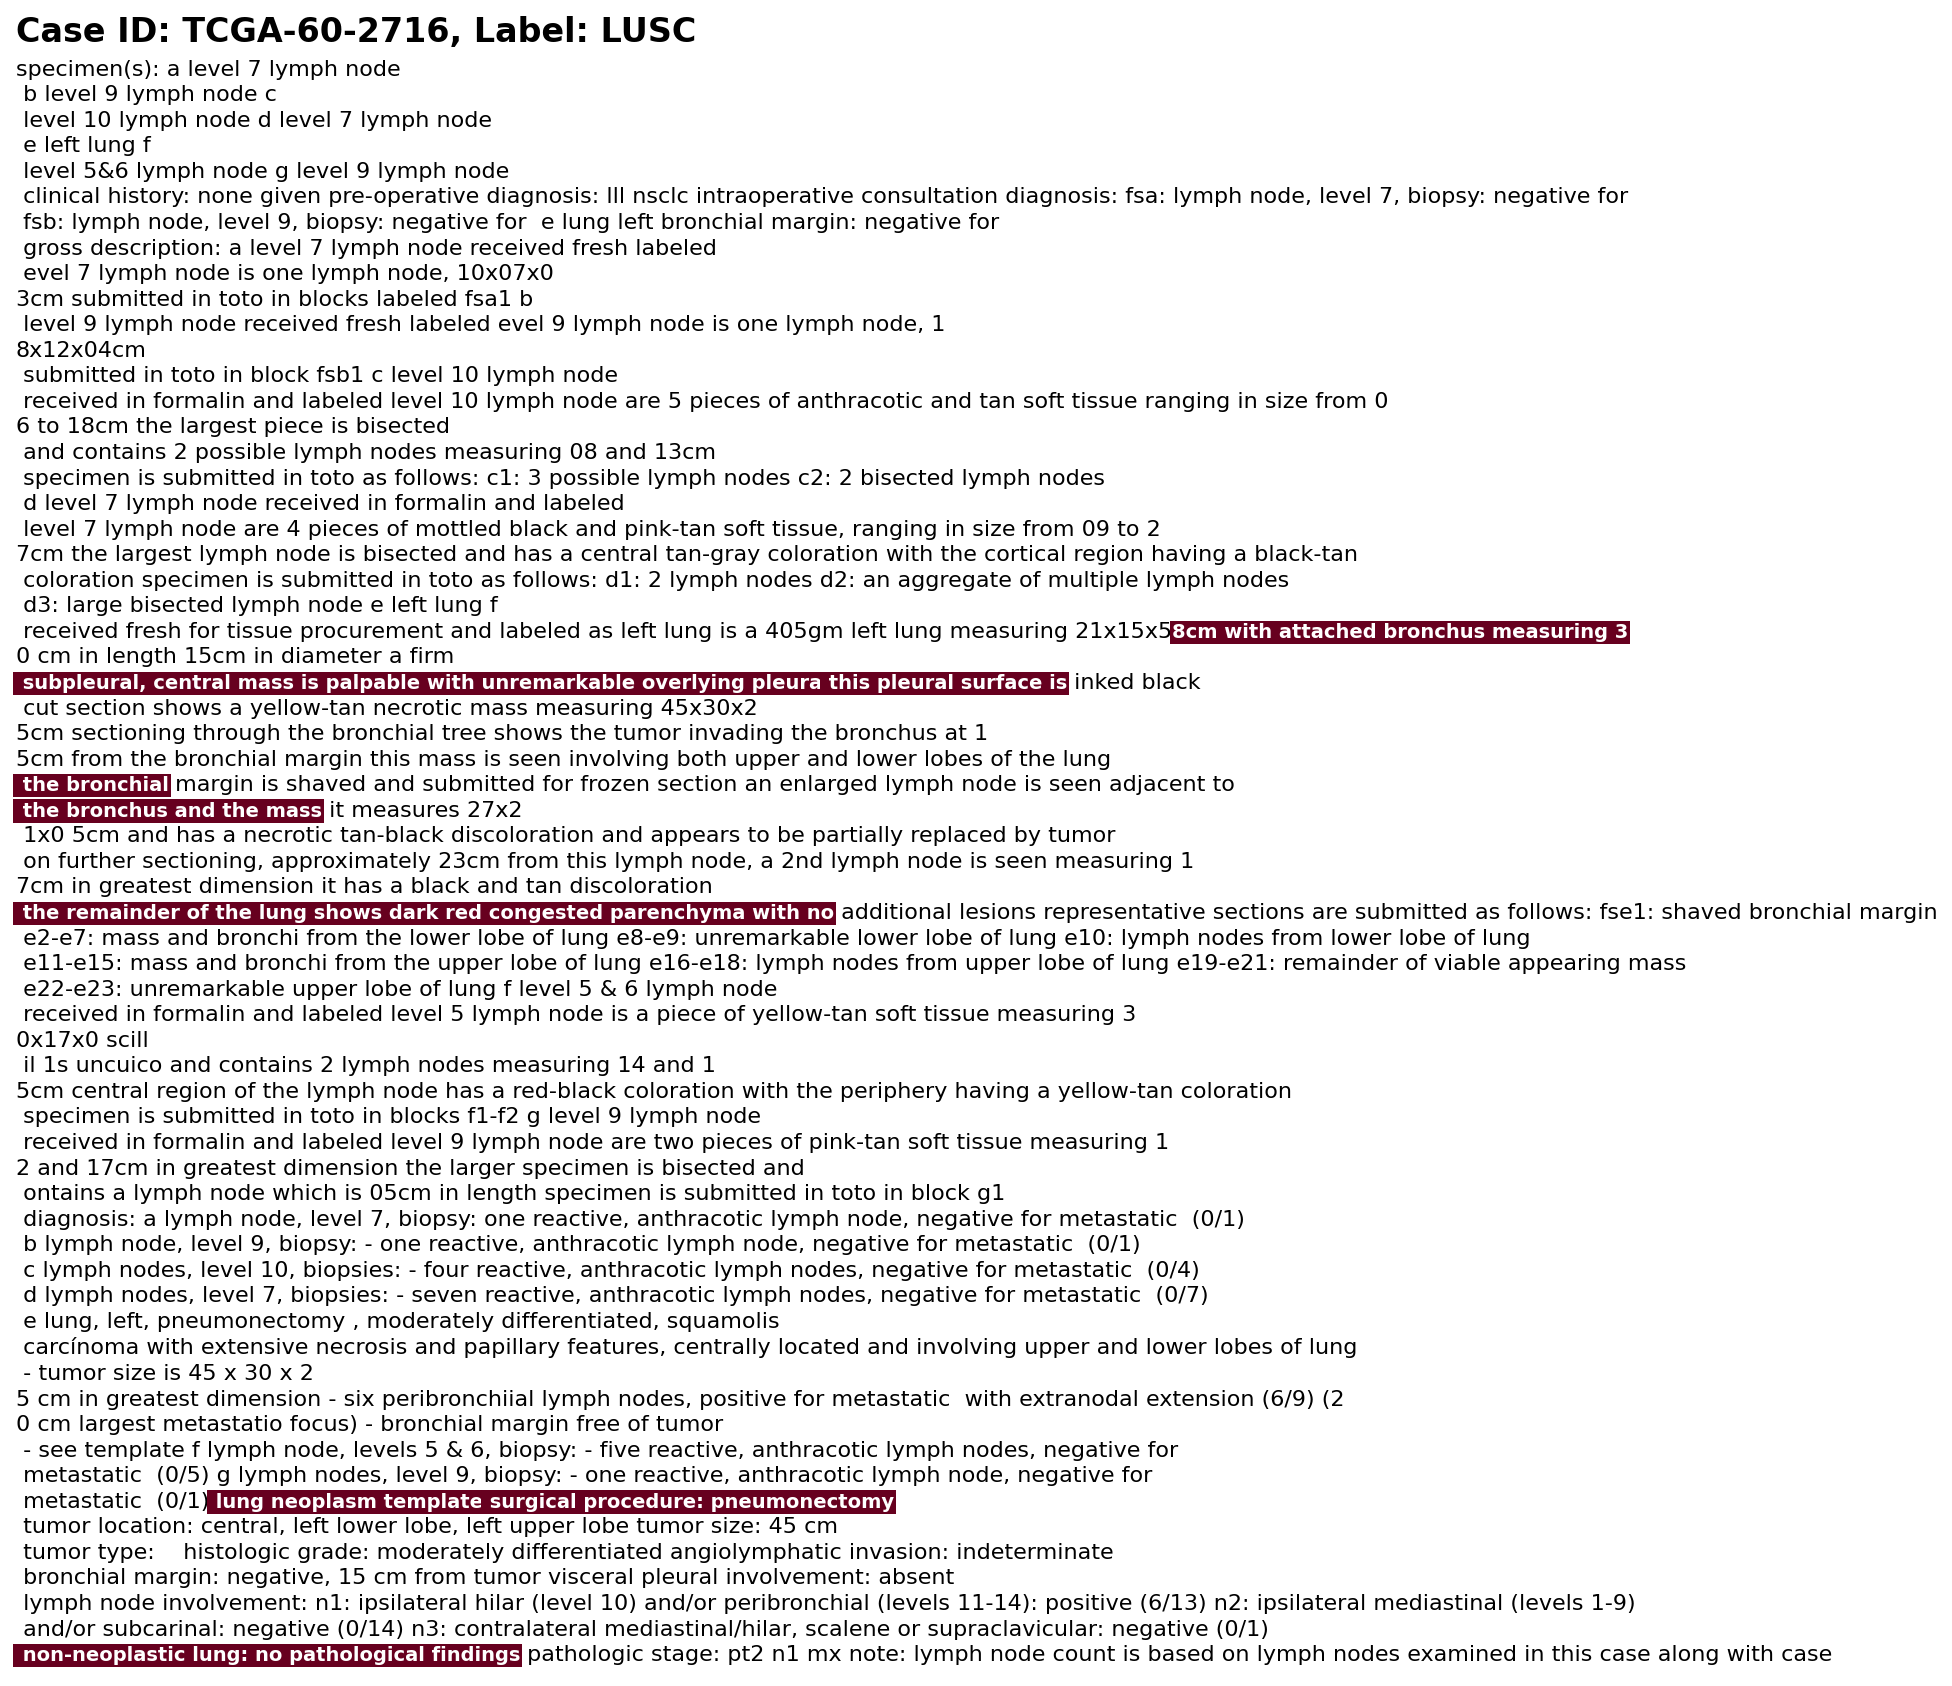

In [6]:
case_id='TCGA-60-2716'

cluster_labels=[12,  9,  7,  9,  7,  9,  7,  9,  7,  3,  7,  9,  7,  9,  4,  4,  9,  9,
  3, 10, 15,  9, 12,  9,  0,  0,  2, 12,  7,  9, 12,  9,  6,  0,  2, 12,
  7,  9, 12,  9,  8,  6,  2, 15,  9,  6,  2, 12,  9,  9,  7,  9, 12,  9,
  8, 11,  2,  9,  8, 15, 12,  9,  9,  7,  3,  3,  0, 13,  2,  2, 15, 13,
 13,  8,  8,  0, 11,  2, 15,  1, 10, 15,  3, 13, 12,  9, 13, 11,  0,  0,
  8,  1, 11,  2,  9,  2,  8,  8, 13,  5, 10,  3,  3,  9,  3,  9,  5,  3,
  7,  9, 12,  9,  8,  6,  0, 15,  9, 11,  6,  2,  9,  8, 12,  7,  9, 12,
  9,  8,  6,  2, 12,  9,  2, 12,  4,  9,  5,  7,  9,  5,  7,  9,  5,  7,
  9,  5,  7,  3,  5,  8,  3, 15,  1,  0,  0,  2,  9,  5,  2,  5, 10, 15,
  7,  9,  5,  7,  9,  5, 13, 13,  3,  1,  2,  1,  5, 14, 10,  1, 14,  9,
  5, 10,  5, 10,  5, 13,  5,  9,  7]
highlight_label=13
label=fdf[fdf['case_id']==case_id]['label'].iloc[0]

patient_sentences=fdf[fdf['case_id']==case_id]['text_filtered_local'].iloc[0]
patient_sentences_unf=fdf[fdf['case_id']==case_id]['text_unfiltered_local'].iloc[0]

sentence_labels=pd.DataFrame()
sentence_labels['sentences']=patient_sentences
sentence_labels['cluster_label']=cluster_labels
sentence_labels['patient_sentences_unf']=patient_sentences_unf
plot_text_highlights(sentence_labels, case_id, label,highlight_label)

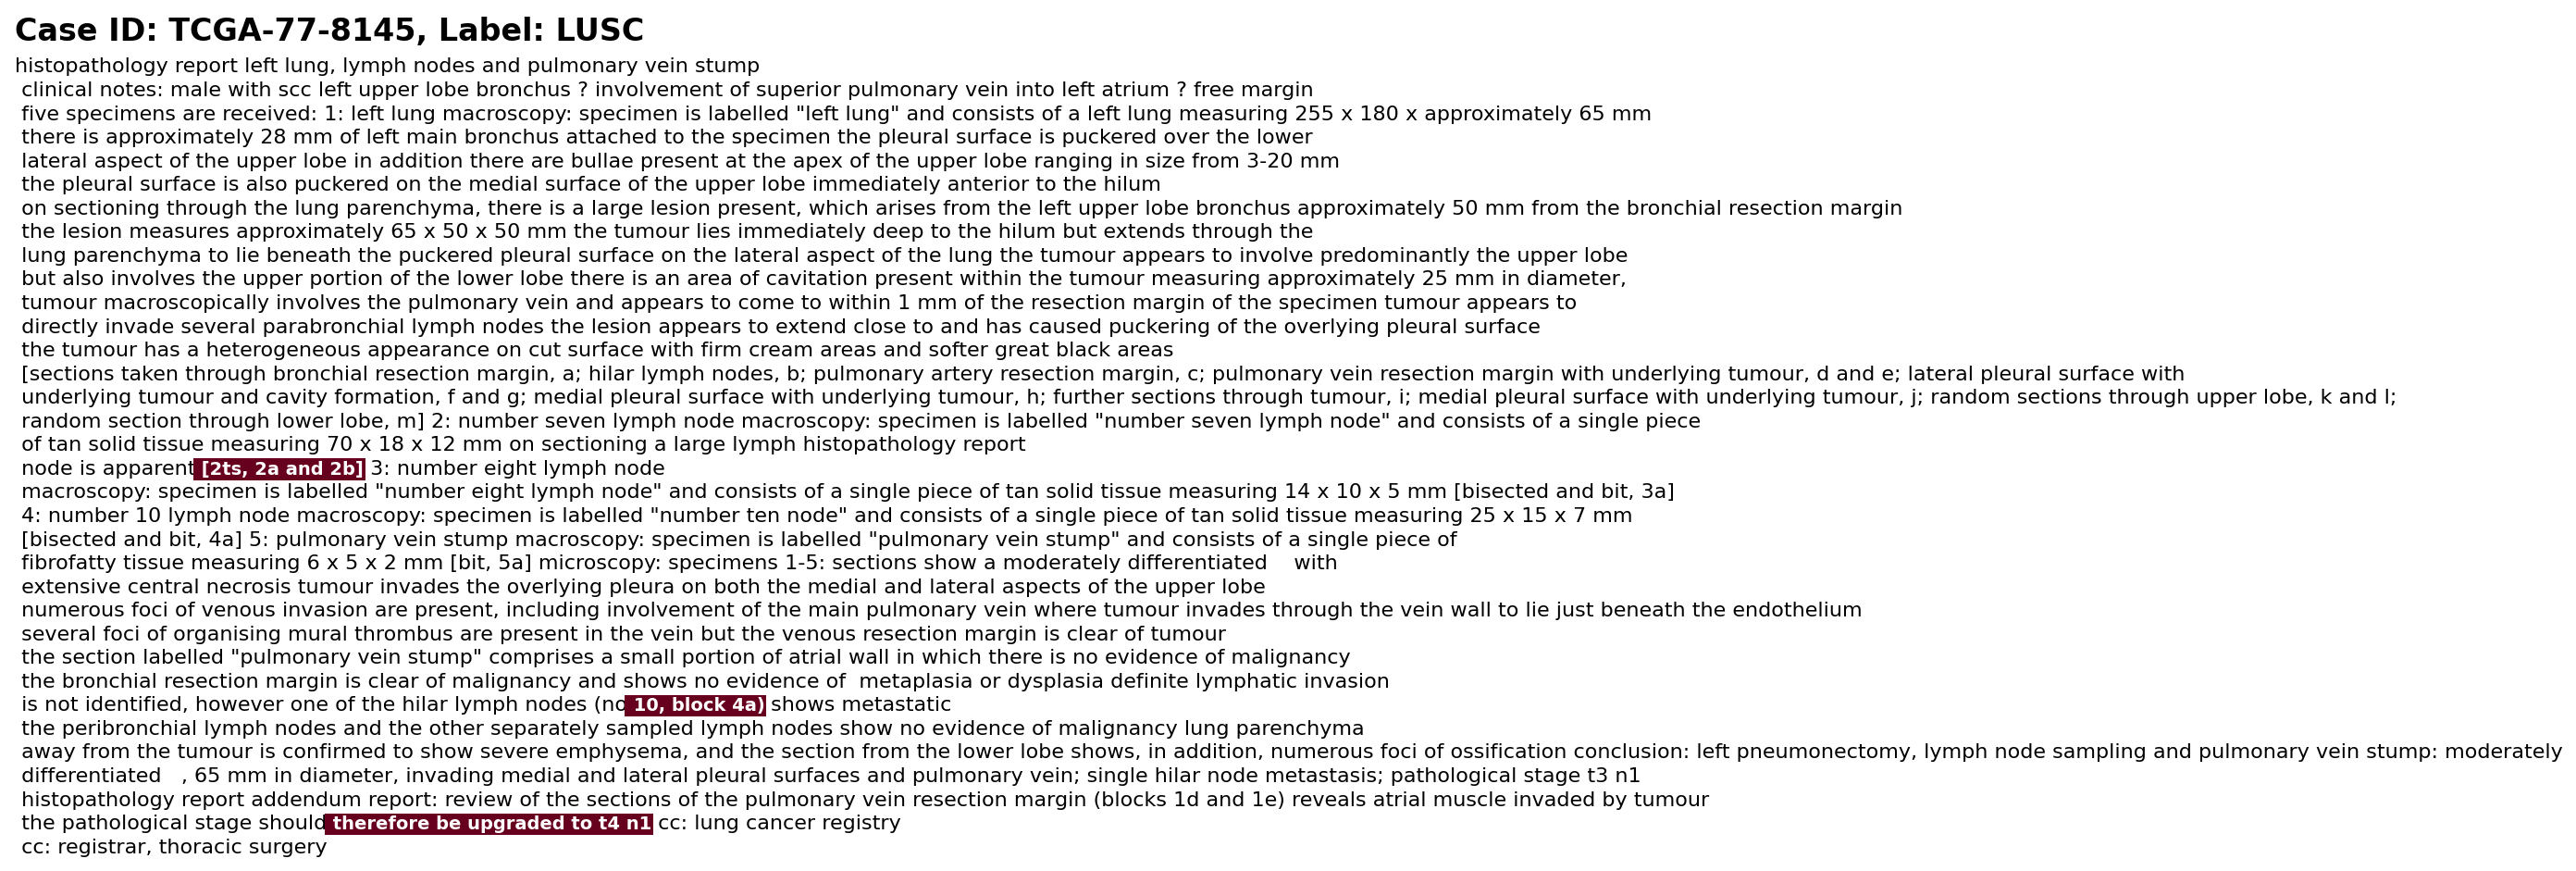

In [7]:
case_id='TCGA-77-8145'

cluster_labels=[ 4, 9, 3, 13, 15, 3, 3, 2, 3, 12, 13, 3, 13, 3, 13, 3, 15, 13,
 3, 10, 8, 2, 1, 13, 13, 3, 3, 15, 1, 1, 10, 1, 9, 5, 13, 7,
 8, 8, 10, 10, 10, 13, 1, 3, 3, 9, 9, 8, 9, 4, 15, 11, 9, 9,
 8, 15, 9, 12, 8, 15, 13, 12, 8, 15, 12, 5, 13, 3, 14, 14, 14, 15,
 5, 10, 13, 15, 5, 10, 5, 14, 9, 11, 5, 9, 9, 13, 1, 3, 9, 14,
 13, 5, 4, 10, 1, 5, 11, 13, 4, 7]
highlight_label=11
label=fdf[fdf['case_id']==case_id]['label'].iloc[0]

patient_sentences=fdf[fdf['case_id']==case_id]['text_filtered_local'].iloc[0]
patient_sentences_unf=fdf[fdf['case_id']==case_id]['text_unfiltered_local'].iloc[0]

sentence_labels=pd.DataFrame()
sentence_labels['sentences']=patient_sentences
sentence_labels['cluster_label']=cluster_labels
sentence_labels['patient_sentences_unf']=patient_sentences_unf
plot_text_highlights(sentence_labels, case_id, label, highlight_label, figsize=(10,10))

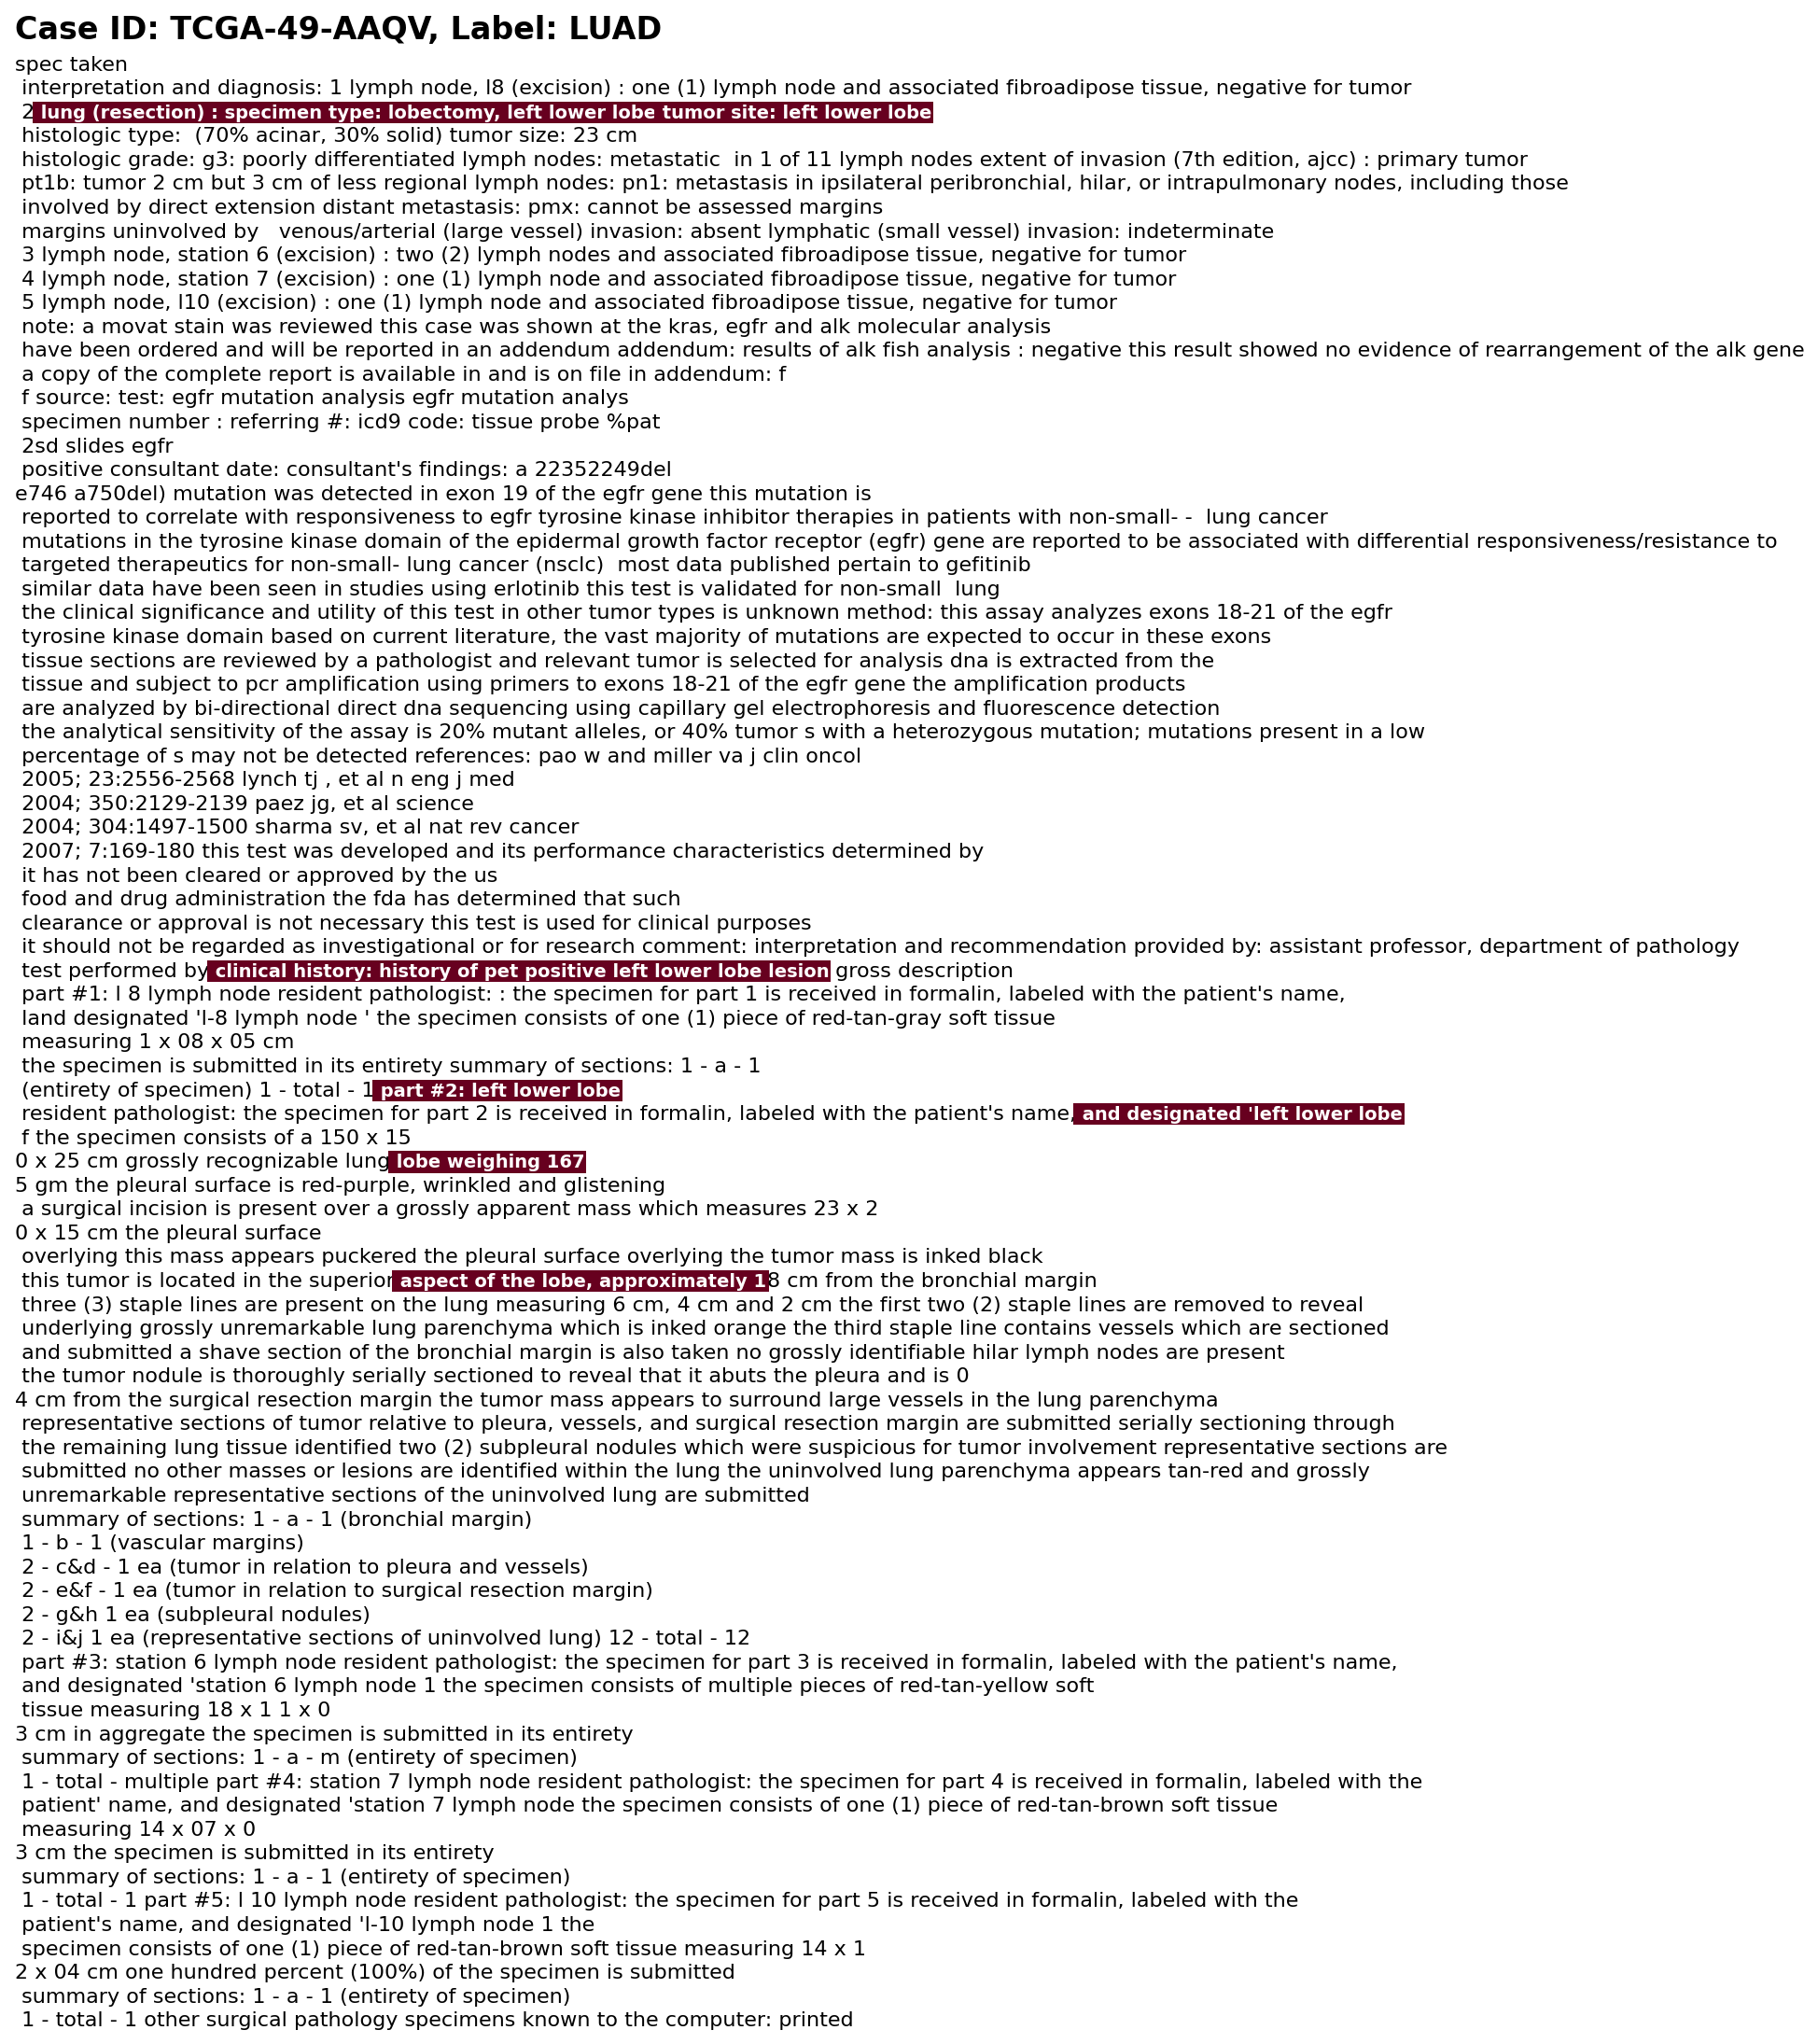

In [8]:
case_id='TCGA-49-AAQV'

cluster_labels=[15, 15,  4,  9,  1, 11,  3,  3,  5,  1,  2,  5,  9,  1,  1,  9,  9, 15,
  5, 15, 15, 14, 14, 11,  9,  1, 11,  9,  1, 11,  9,  1,  5, 15,  5, 12,
  5,  5, 15, 15, 15,  7,  5,  5, 12, 15, 15, 11, 15, 15, 15,  4, 11,  5,
  5,  5,  5,  5, 13,  5,  5,  5,  5, 15,  5, 15,  5,  5,  4,  1,  5,  5,
 15,  5,  4,  1, 15,  5,  5, 15,  5,  5,  5,  5,  5,  5,  5, 15,  4, 15,
 15, 15, 15, 15, 15, 15, 15,  5, 11, 15, 15, 15, 15,  7, 15, 15,  4, 15,
 15,  4, 15, 15,  4, 15,  3, 15,  9, 12,  4,  9,  7,  8,  0,  0,  2, 12,
 15,  6, 12,  6,  3, 12,  4,  3,  7, 12,  0,  0, 13,  3, 11, 13, 15, 13,
 11,  0,  0,  2, 13,  8, 13,  1,  1,  3, 10, 13,  2, 15, 13, 15, 15, 12,
 10,  9,  1,  1, 13, 10,  1, 13,  1, 10, 12, 13,  1, 15, 15, 13, 13, 15,
 13, 15, 15,  6, 10,  7,  6, 10, 11,  6,  1, 11,  6,  1, 11,  6, 13, 11,
 13, 11,  9, 12,  4,  9,  6,  8,  8,  0,  0,  2, 12, 12, 15,  7, 12,  6,
  9, 12,  4,  9,  8,  6,  0,  0,  2, 12, 15, 15,  6, 12,  6,  9, 12,  4,
  9,  6,  8,  6,  0,  0,  2, 12, 15,  6, 12,  6, 12,  7]
highlight_label=3
label=fdf[fdf['case_id']==case_id]['label'].iloc[0]

patient_sentences=fdf[fdf['case_id']==case_id]['text_filtered_local'].iloc[0]
patient_sentences_unf=fdf[fdf['case_id']==case_id]['text_unfiltered_local'].iloc[0]

sentence_labels=pd.DataFrame()
sentence_labels['sentences']=patient_sentences
sentence_labels['cluster_label']=cluster_labels
sentence_labels['patient_sentences_unf']=patient_sentences_unf
sentence_labels
plot_text_highlights(sentence_labels, case_id, label, highlight_label, figsize=(10,10))